In [ ]:
# [CH2] - 개인 과제
# 1. **지도학습 과제** :: 주택 가격 예측 모델 구축

In [142]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression, SelectKBest
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [143]:
df = pd.read_csv('housingdata.csv')

In [126]:
df.head()
# print(df.isnull().sum())

,CRIM,INDUS,NOX,RM,DIS,RAD,PTRATIO,LSTAT,MEDV
0,0.00632,2.31,0.538,6.575,4.0900,1,15.3,4.980000,24.0
1,0.02731,7.07,0.469,6.421,4.9671,2,17.8,9.140000,21.6
2,0.02729,7.07,0.469,7.185,4.9671,2,17.8,4.030000,34.7
3,0.03237,2.18,0.458,6.998,6.0622,3,18.7,2.940000,33.4
4,0.06905,2.18,0.458,7.147,6.0622,3,18.7,7.770592,36.2


In [144]:
# Step 01. 데이터 전처리 - 1) 결측치 처리

# 1. 결측치 컬럼값 대체
df['CRIM']  = df['CRIM'].fillna(df['CRIM'].median())
df['ZN']    = df['ZN'].fillna(0)
df['INDUS'] = df['INDUS'].fillna(df['INDUS'].median())
df['CHAS']  = df['CHAS'].fillna(0)
df['AGE']   = df['AGE'].fillna(df['AGE'].median())
# df["LSTAT"] = df['LSTAT'].fillna(0)

# 2. 결측값 예측을 통한 대체
df_with_na = df[df['LSTAT'].isnull()]
df_without_na = df[df['LSTAT'].notnull()]

# LSTAT과 상관관계 높은 컬럼 선택 (>= 0.5)
lstat_correlated_features = ['INDUS', 'NOX', 'AGE', 'TAX']

# 회귀 모델 학습
lr = LinearRegression()
X_train_lstat = df_without_na[lstat_correlated_features]
y_train_lstat = df_without_na["LSTAT"]
lr.fit(X_train_lstat, y_train_lstat)

# 결측값 예측
X_pred = df_with_na[lstat_correlated_features]
lstat_predicted_values = lr.predict(X_pred)

# 예측값으로 결측값 대체
df.loc[df["LSTAT"].isnull(), "LSTAT"] = lstat_predicted_values

# 3. 컬럼 삭제
df = df.drop(['ZN', 'CHAS', 'AGE', 'TAX', 'B'], axis=1)

In [145]:
# MEDV와 상관관계 높은 컬럼 선택 (>= 0.5)
medv_correlated_features = ['INDUS', 'NOX', 'RM', 'LSTAT']
# medv_correlated_features = ['INDUS', 'NOX', 'RM']
# medv_correlated_features = ['RM', 'LSTAT']

In [98]:
# Step 01. 데이터 전처리 - 2) 이상치 탐지 및 제거

# 1. 특정 열의 이상치 확인 (IQR 방법)
for col in medv_correlated_features:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # 이상치 범위 설정
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 확인
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    # 이상치 제거
    df = df.drop(outliers.index)

print(len(df))

472


In [146]:
# Step 01. 데이터 전처리 - 3) 훈련 데이터 생성

X = df[medv_correlated_features]
# X = df[df.columns.difference(['MEDV'])]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# 관게 높은 변수 5개 선택
# selector = SelectKBest(score_func=f_regression, k=5)

# X_train_selected = selector.fit_transform(X_train, y_train)
# X_test_selected = selector.transform(X_test)

In [103]:
# Step 01. 데이터 전처리 - 4) 훈련 데이터 스케일링
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [147]:
# Step 02. 모델 비교 - 1) 선형 회귀 모델
lr = LinearRegression()

# 모델 학습
lr.fit(X_train, y_train)

# 모델 예측
y_pred = lr.predict(X_test)

# 예측 값 출력
print("예측 값:", y_pred)

# 실제 값과 비교
print("실제 값:", y_test.values)

print("R^2 점수:", lr.score(X_test, y_test))

# 가중치
coef = lr.coef_
intercept = lr.intercept_

예측 값: [25.4884988  30.81731076 16.25248019 25.59585757 19.43334949 22.52722306
 17.20491818 13.98015918 21.44327545 20.37956156 17.30224739 18.56757587
 -1.91217298 22.05830326 20.38820885 23.28427833 16.15877318  3.89891189
 37.30748597 18.32945965 26.93723981 27.13603528 13.6685295  24.5510745
 18.94890125 14.20464832 22.08025396 20.71901455 17.91861381 19.34243554
 18.19520368 26.85791723 26.8796712  19.23455036 15.13973605 17.58439985
 32.65704715 22.65831776 20.07348002 26.4349594  12.90442385 29.21774369
 37.95691398 18.90541495 26.15650535 16.54608627 16.25854033 26.63093252
 19.09940251 29.55039069 20.98176084]
실제 값: [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9]
R^2 점수: 0.6824544708898732


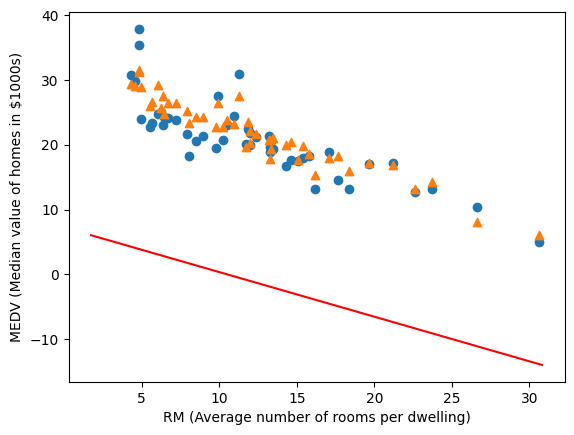

In [ ]:
# 시각화
# 1. 훈련/테스트 세트 설정
plt.scatter(X_train['RM'], y_train, label='train')
plt.scatter(X_test['RM'], y_test, label='test')

# 예측 값 설정
plt.scatter(X_test['RM'], y_pred, marker='^')

# 특정 독립 변수 (RM)에 대한 회귀선 계산
x_range = np.linspace(X_train['RM'].min(), X_train['RM'].max(), 100)  # 'RM' 범위 내에서 100개의 값 생성
y_range = coef[medv_correlated_features.index('RM')] * x_range + intercept  # 회귀선 방정식: y = w * x + b

# 회귀선 그리기
plt.plot(x_range, y_range, color='red')

# 산점도 표시
plt.xlabel("RM (Average number of rooms per dwelling)")
plt.ylabel("MEDV (Median value of homes in $1000s)")
plt.show()

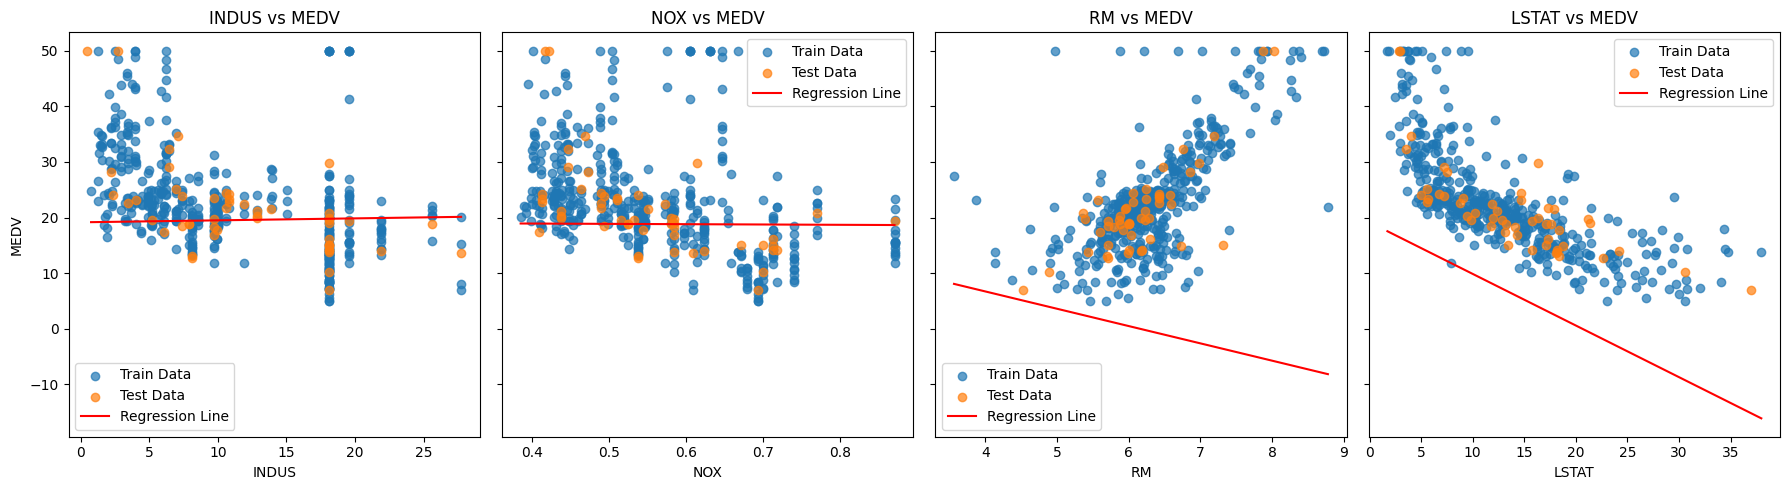

In [130]:
num_features = len(medv_correlated_features)

# 서브플롯 생성
fig, axes = plt.subplots(1, num_features, figsize=(18, 5), sharey=True)  # 1행 num_features열 서브플롯

for i, feature in enumerate(medv_correlated_features):
    # 현재 컬럼의 데이터와 범위 설정
    x_train = X_train[feature]
    x_test = X_test[feature]
    x_range = np.linspace(x_train.min(), x_train.max(), 100)
    y_range = coef[i] * x_range + intercept  # 회귀선 방정식: y = w * x + b

    # 산점도: 훈련 데이터와 테스트 데이터
    axes[i].scatter(x_train, y_train, label="Train Data", alpha=0.7)
    axes[i].scatter(x_test, y_test, label="Test Data", alpha=0.7)

    # 회귀선 추가
    axes[i].plot(x_range, y_range, color="red", label="Regression Line")

    # 서브플롯 설정
    axes[i].set_title(f"{feature} vs MEDV")
    axes[i].set_xlabel(feature)
    if i == 0:  # 첫 번째 플롯에만 y축 레이블 추가
        axes[i].set_ylabel("MEDV")
    axes[i].legend()

# 전체 레이아웃 조정
plt.tight_layout()
plt.show()


In [138]:
from sklearn.preprocessing import LabelEncoder

# 예: y가 연속형 또는 문자열 값일 경우
le = LabelEncoder()
y_train = le.fit_transform(y_train)  # 범주형 데이터로 변환
y_train

array([192,  51, 147, 210, 107,  79, 157, 133,  80, 142, 192, 174,  97,
       135,  95,  35, 141, 170,  32,  95, 131,  19, 101, 103,   0,  96,
       218,  20,   3, 104,  67, 104,  15,  89, 160,  60, 142, 142,  66,
       126,  17,  91,  67, 152, 124, 220,  74,  14,  67, 119, 108,  27,
        94,  89,  38,  77, 139, 106, 140,  11, 152, 102, 195, 175,  24,
       204,  42, 112, 131,  71, 137,  12,  87, 144,  99, 125, 202,  54,
       214,  55, 120,  46,  82,  73,  57, 101, 175, 161,  54,  70, 119,
        89,  88,  10, 101,  65,  66,  46, 220,  44,  31, 159, 107,  88,
       125,  86, 142, 186,   0, 163,  82, 111, 125, 122, 105, 219,  47,
        62, 151,  96,  93, 105, 205, 126,  99,  80, 162, 196, 137,  25,
        41,  29,  73, 183, 149,  38,  45, 220, 114,  94, 132,  70,  32,
         1, 172, 145,  89,  63,  41, 123,  52, 152, 194, 123, 138, 142,
       220, 189, 176, 135, 115,  43, 208,  88, 178, 146, 112, 111,   8,
       216, 209, 174,  18,  63,  95, 185,  73, 220, 100, 126,  3

In [148]:
# Step 02. 모델 비교 - 2) 랜덤포레스트 모델
from sklearn.ensemble import RandomForestClassifier

# 모델 학습
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# 모델 예측
y_pred = rf.predict(X_test)

# 예측 값 출력
print("예측 값:", y_pred)

# 실제 값과 비교
print("실제 값:", y_test.values)

# 모델 평가
print("R^2 점수:", lr.score(y_test, y_pred))

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [ ]:
# Step 02. 모델 비교 - 3) 랜덤 포레스트 모델

Selected names:  Index(['INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RM'], dtype='object')
Unselected names:  Index(['CRIM', 'DIS', 'RAD'], dtype='object')


In [150]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# 1. 선형 회귀 모델
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("선형 회귀 결과:")
print(f"RMSE: {lr_rmse:.2f}, R^2: {lr_r2:.2f}")

# 2. 랜덤 포레스트 모델
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
rf_r2 = r2_score(y_test, rf_predictions)
print("\n랜덤 포레스트 결과:")
print(f"RMSE: {rf_rmse:.2f}, R^2: {rf_r2:.2f}")

# 3. 결정 트리 모델
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_predictions))
dt_r2 = r2_score(y_test, dt_predictions)

print("\n결정 트리 결과:")
print(f"RMSE: {dt_rmse:.2f}, R^2: {dt_r2:.2f}")


선형 회귀 결과:
RMSE: 4.45, R^2: 0.68
랜덤 포레스트 예측 값: [22.693 30.278 16.14  22.45  14.536 20.467 18.068 12.908 21.321 21.243
 18.557 18.901  8.912 20.872 19.191 27.587 19.201  8.18  47.754 14.004
 25.038 24.158 14.106 20.982 14.48  13.666 20.316 14.893 20.103 21.752
 18.998 23.539 28.281 19.935 14.391 14.619 34.435 19.781 19.874 24.866
 15.838 28.923 45.33  18.694 22.283 15.342 15.688 24.219 18.123 27.269
 21.04 ]
랜덤 포레스트 실제 값: [23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9]

랜덤 포레스트 결과:
RMSE: 2.92, R^2: 0.86

결정 트리 결과:
RMSE: 4.68, R^2: 0.65
